# This code is completed by - Kolluru Saharsh 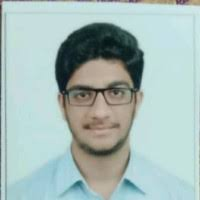     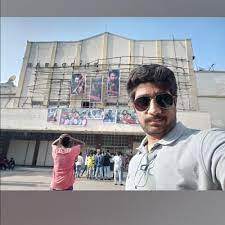  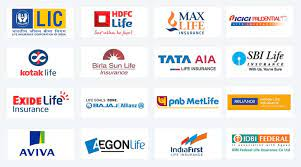

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as smi
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.simplefilter('ignore')

C:\Users\saharsh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.mean()

age            39.207025
bmi            30.665471
children        1.094918
expenses    13270.422414
dtype: float64

In [6]:
df.median()

age           39.00
bmi           30.40
children       1.00
expenses    9382.03
dtype: float64

In [7]:
df.skew()

age         0.055673
bmi         0.284593
children    0.938380
expenses    1.515880
dtype: float64

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [10]:
df.shape 

(1338, 7)

## EDA

<AxesSubplot:>

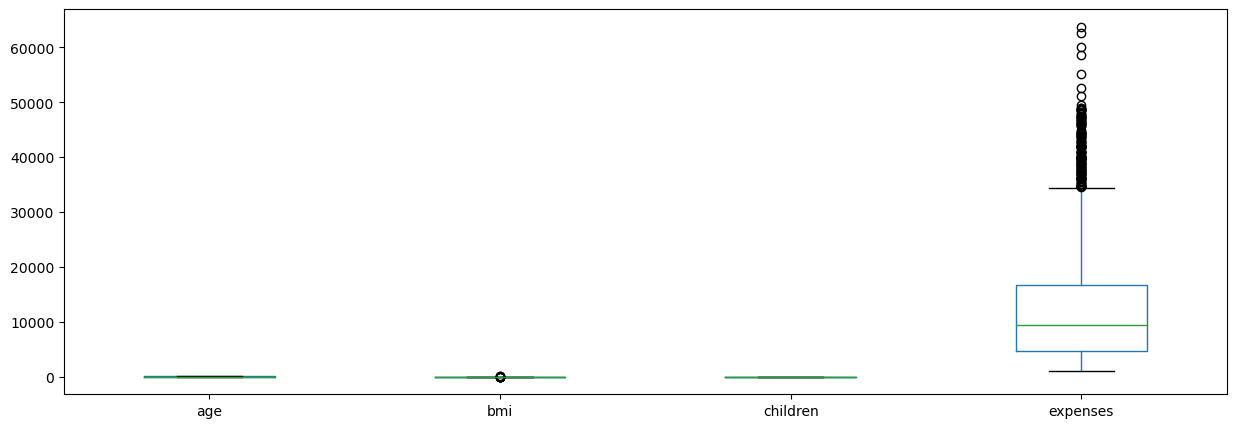

In [11]:
df.boxplot(figsize=(15,5) ,grid= False)

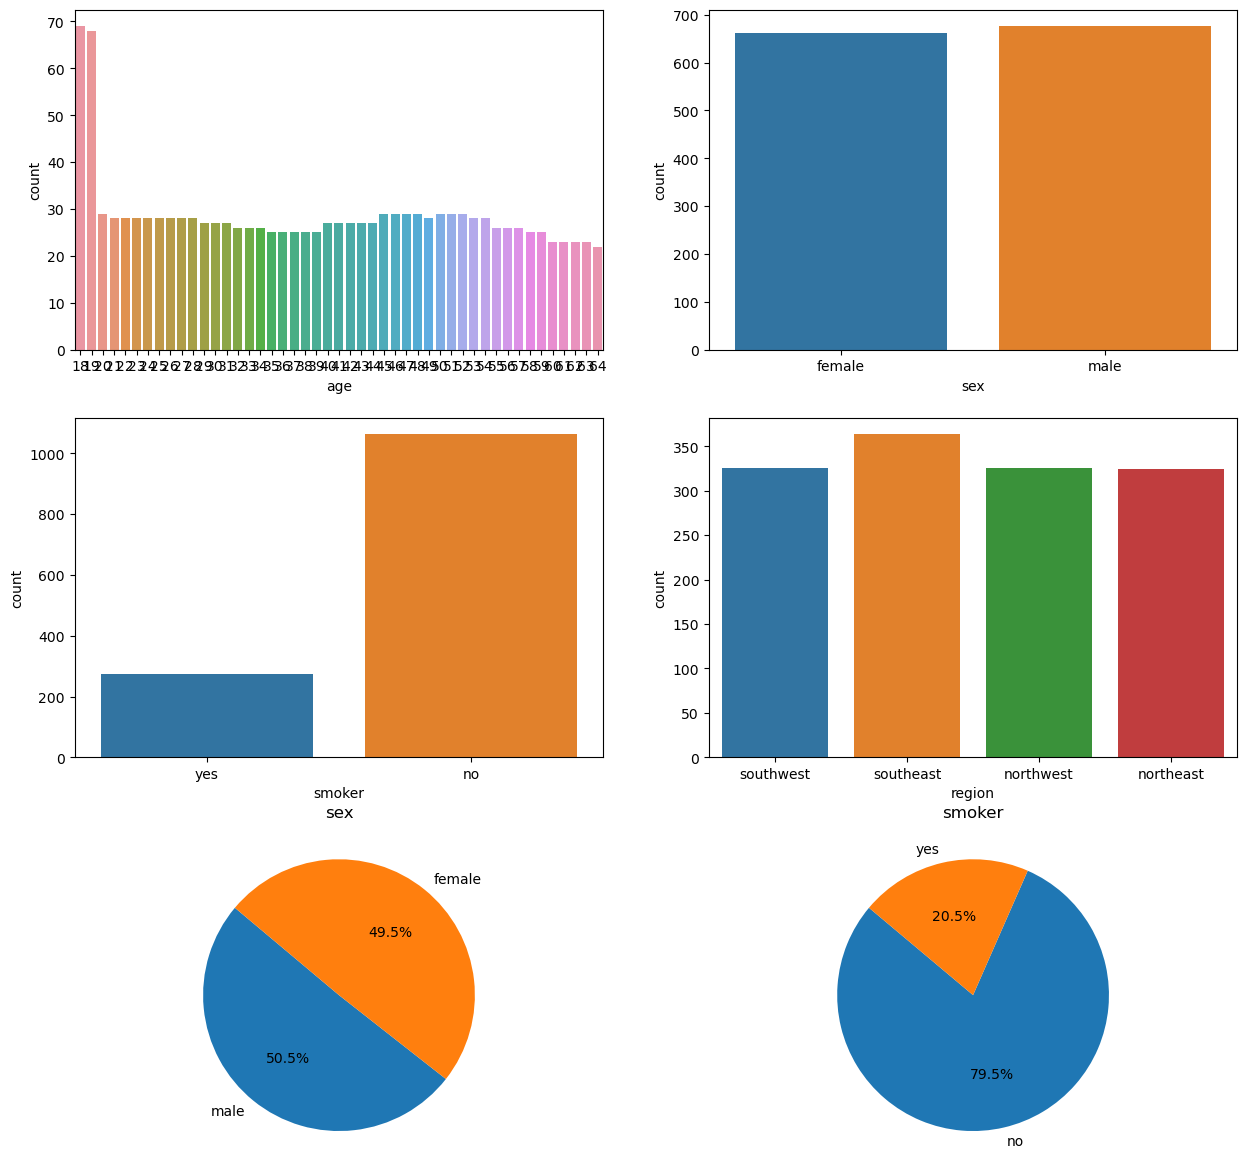

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(data = df, x ='age', ax=ax[0,0])
sns.countplot(data = df, x ='sex', ax=ax[0,1])
sns.countplot(data = df, x ='smoker', ax=ax[1,0])
sns.countplot(data = df, x ='region', ax=ax[1,1])
ax[2,0].pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,0].set_title('sex')

ax[2,1].pie(df['smoker'].value_counts(), labels=df['smoker'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,1].set_title('smoker')

plt.show()

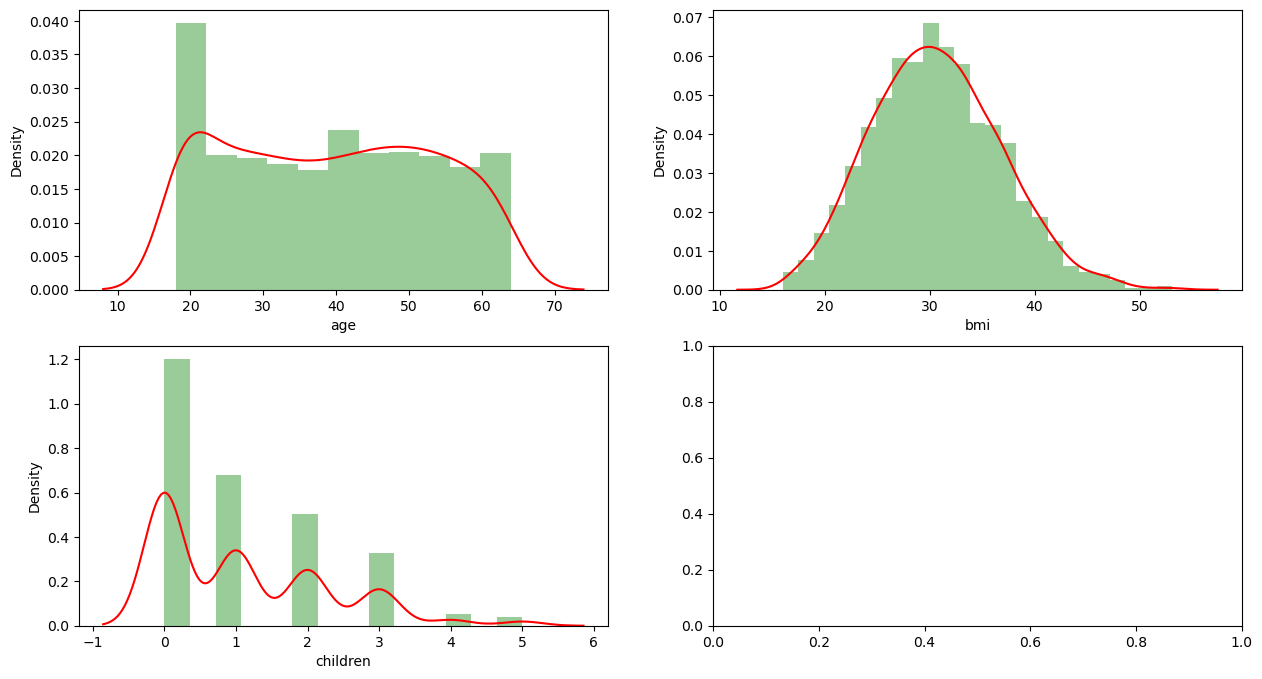

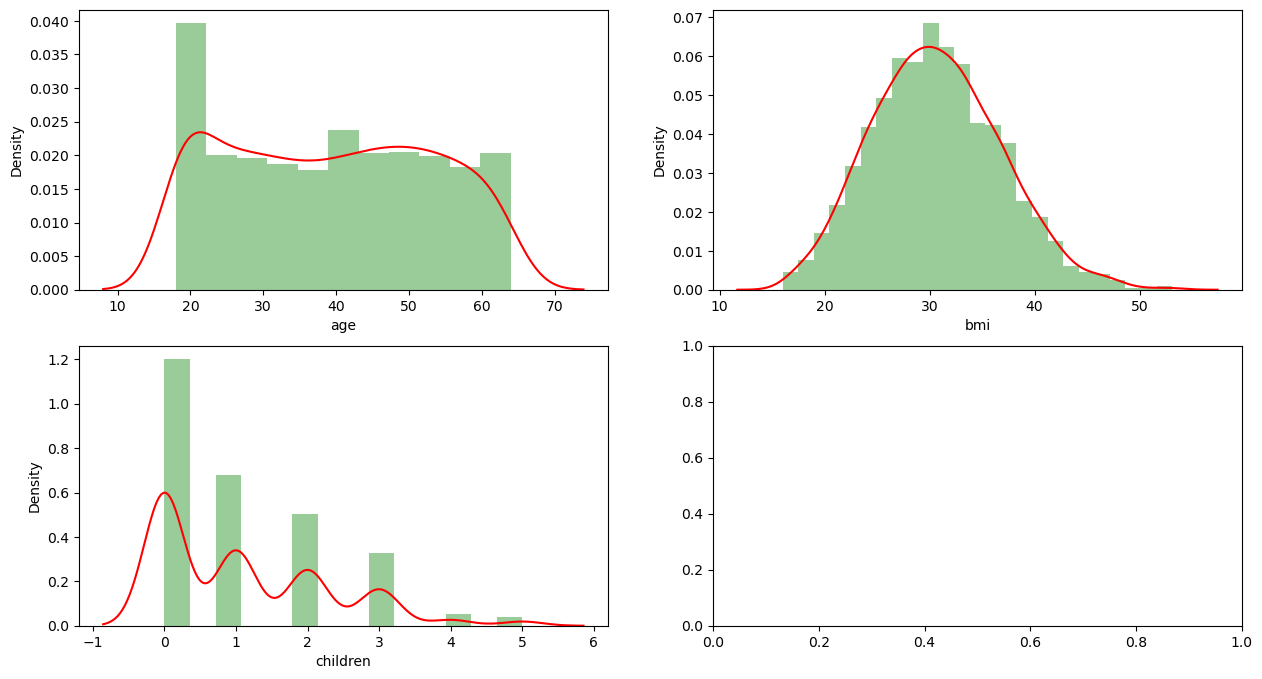

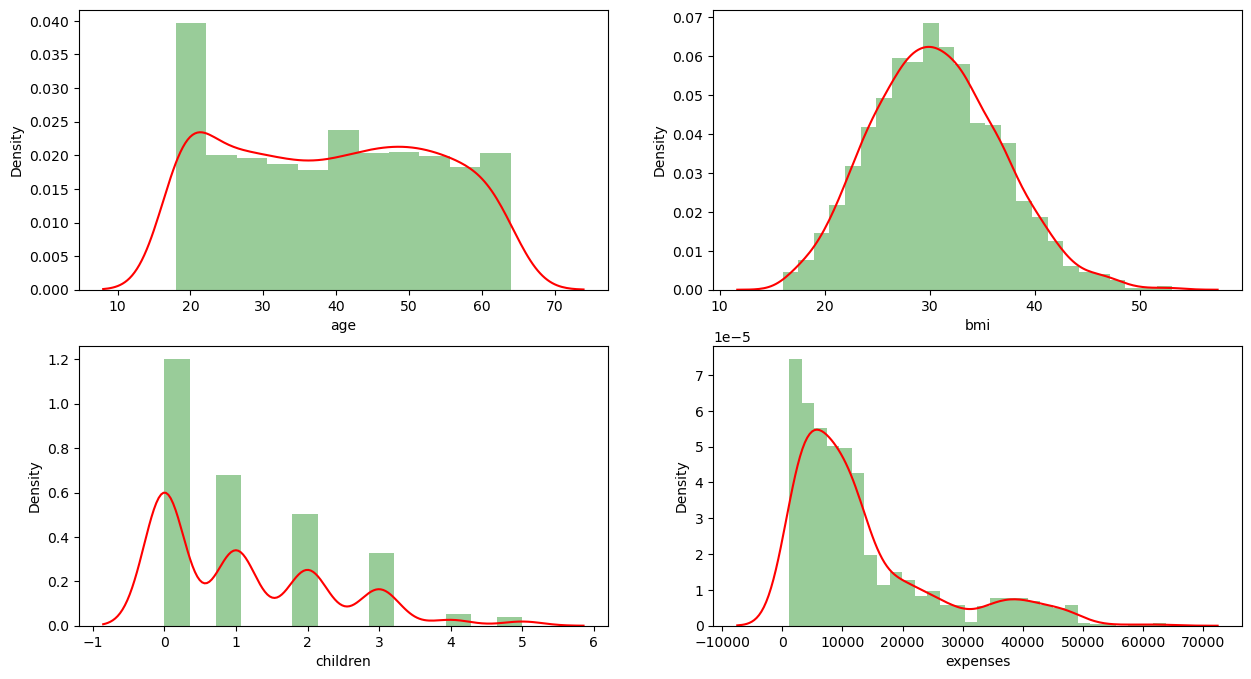

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.distplot(df['age'],ax=ax[0,0], color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['bmi'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['children'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['expenses'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'green'})

plt.show()

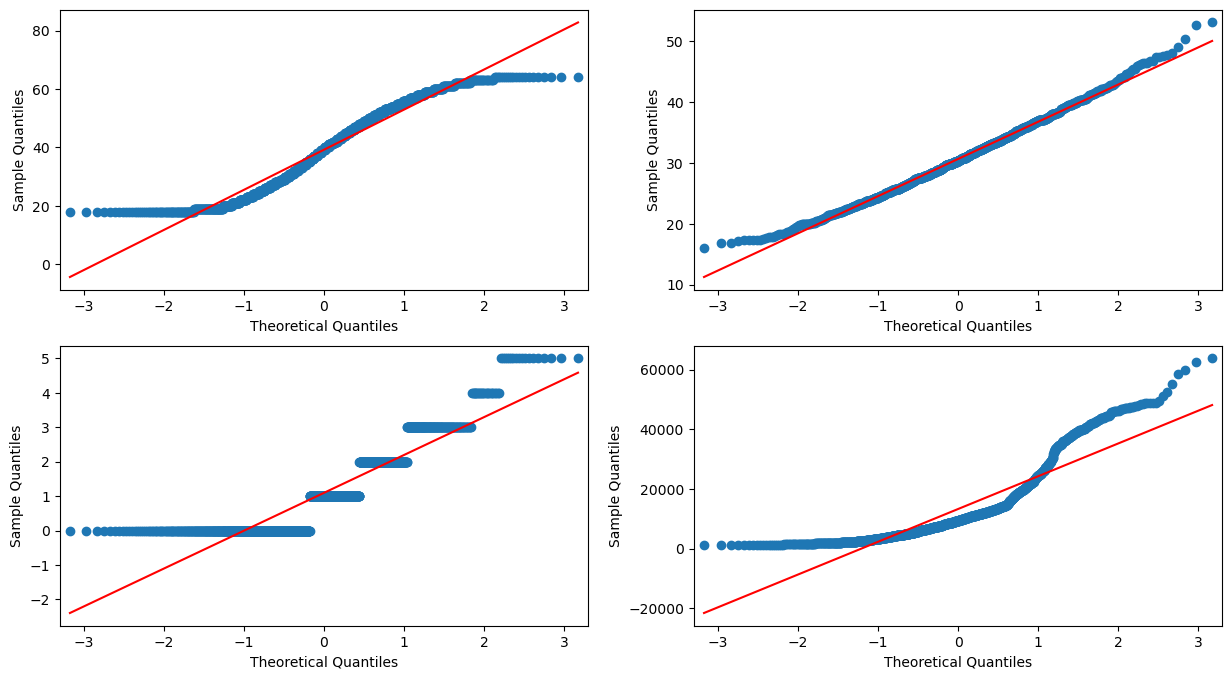

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

smi.qqplot(df['age'],line="r", ax = ax[0,0])
smi.qqplot(df['bmi'],line="r", ax = ax[0,1])
smi.qqplot(df['children'],line="r", ax = ax[1,0])
smi.qqplot(df['expenses'],line="r", ax = ax[1,1])

plt.show()

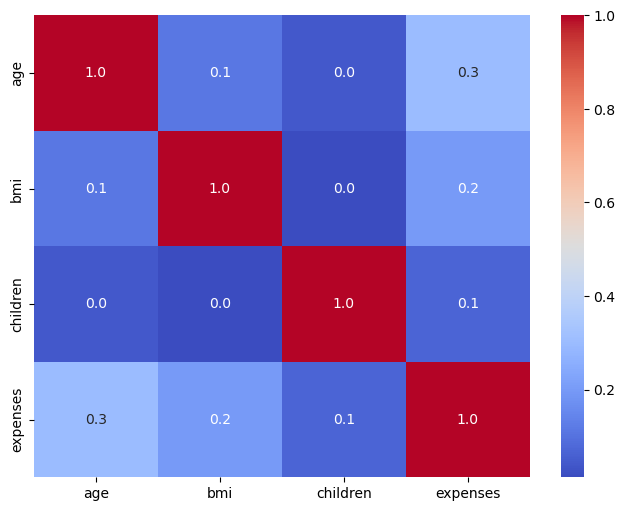

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='coolwarm')
plt.show()

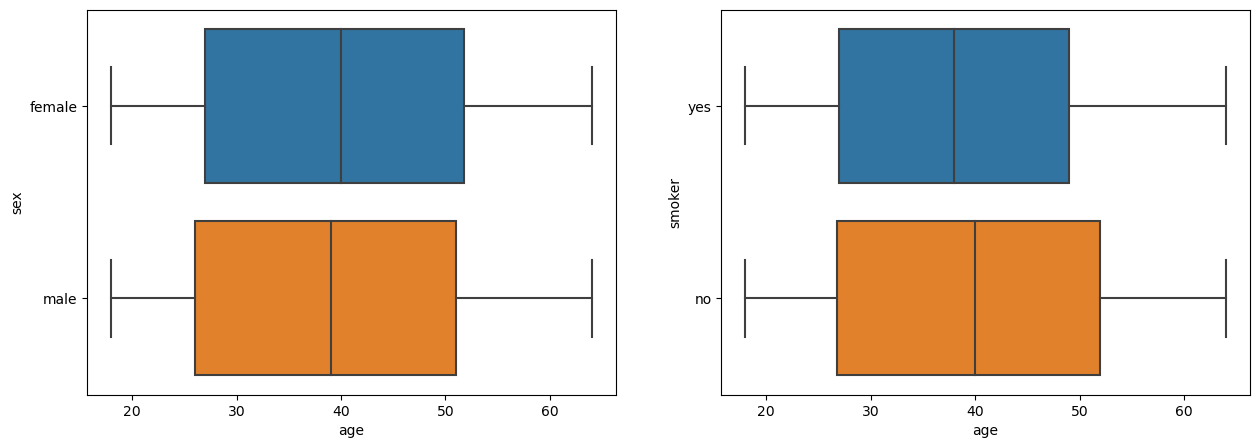

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='age', y='sex', ax = ax[0])
sns.boxplot(data=df, x='age', y='smoker', ax = ax[1])

plt.show()


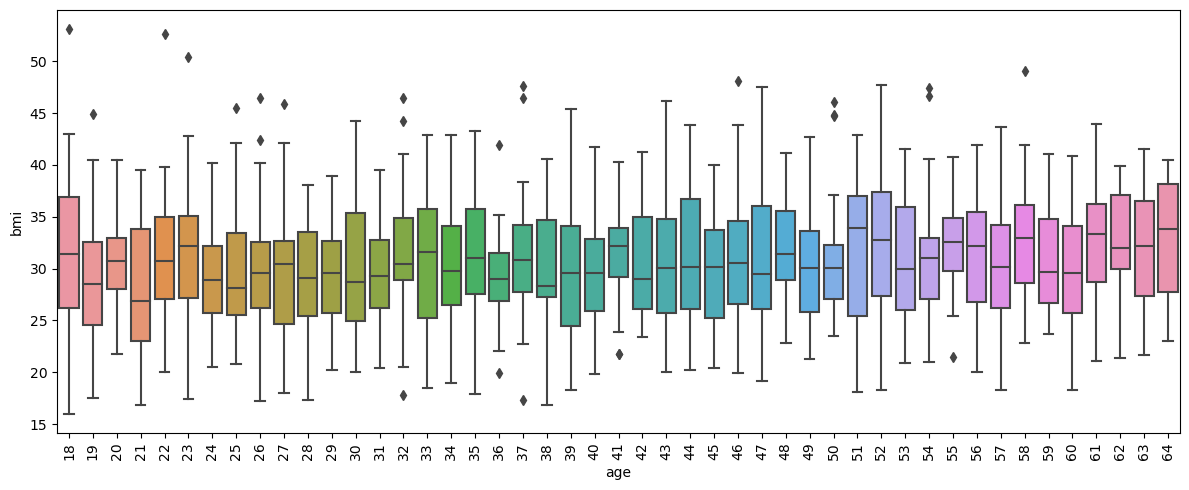

In [19]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=df, x='age', y='bmi')

plt.xlabel('age')
plt.ylabel('bmi')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

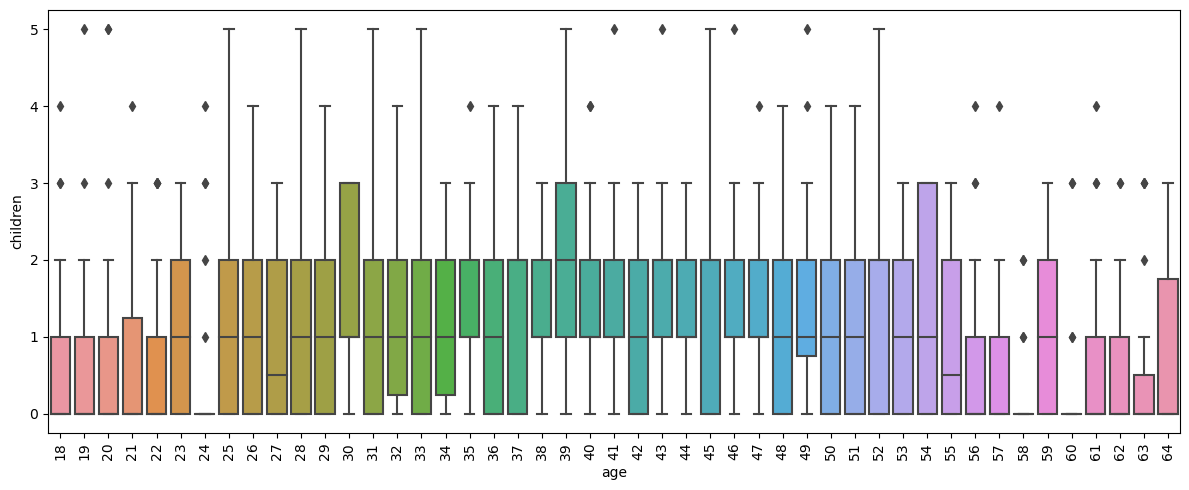

In [20]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=df, x='age', y='children')

plt.xlabel('age')
plt.ylabel('children')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

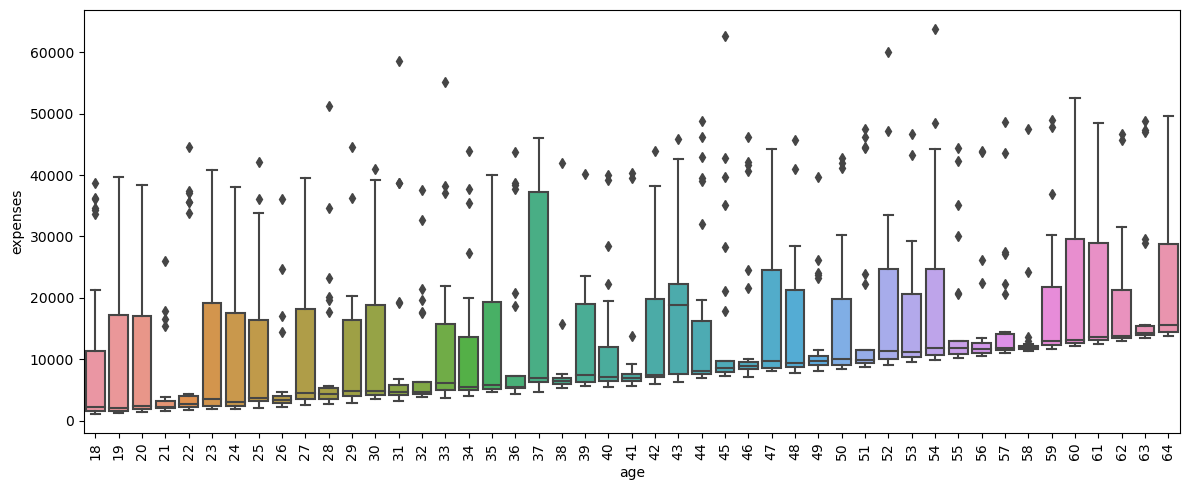

In [24]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=df, x='age', y='expenses')

plt.xlabel('age')
plt.ylabel('expenses')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

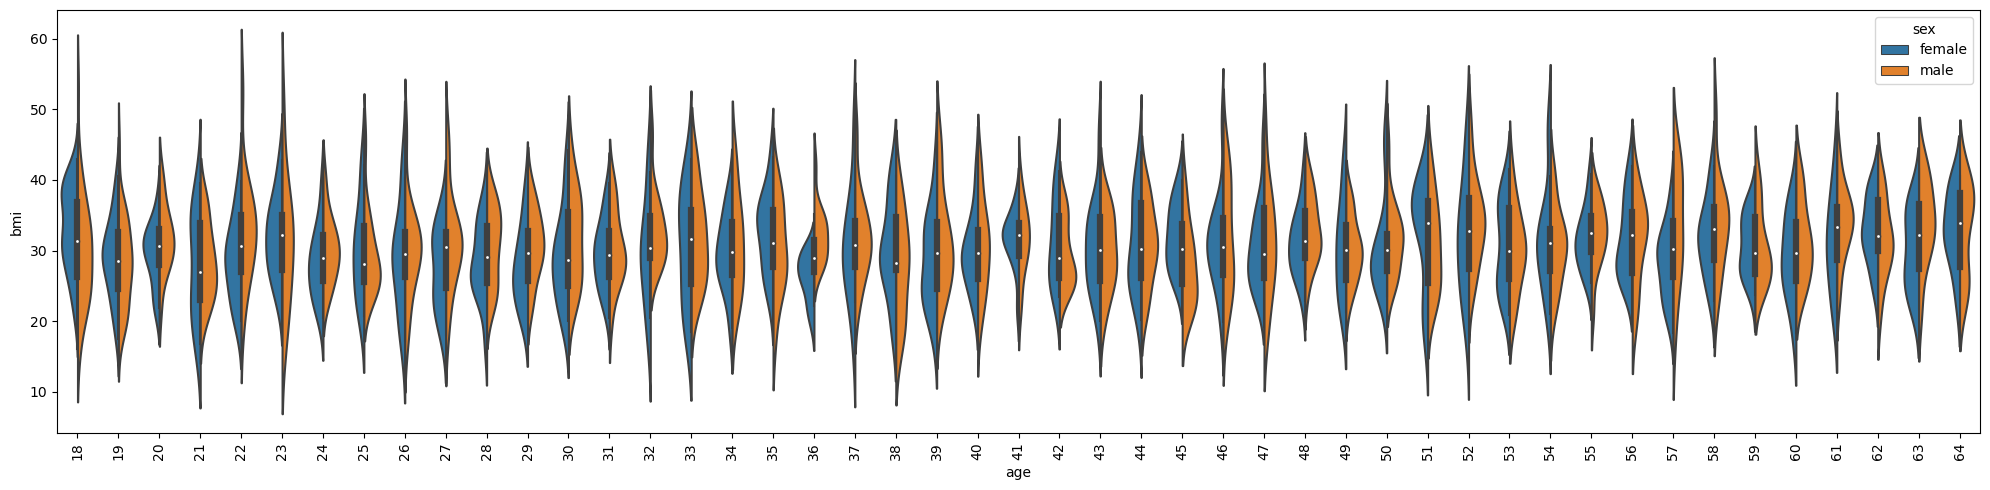

In [25]:
plt.figure(figsize=(20, 5))

sns.violinplot(data=df, x='age', y='bmi', hue = 'sex' ,split=True)

plt.xlabel('age')
plt.ylabel('bmi')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

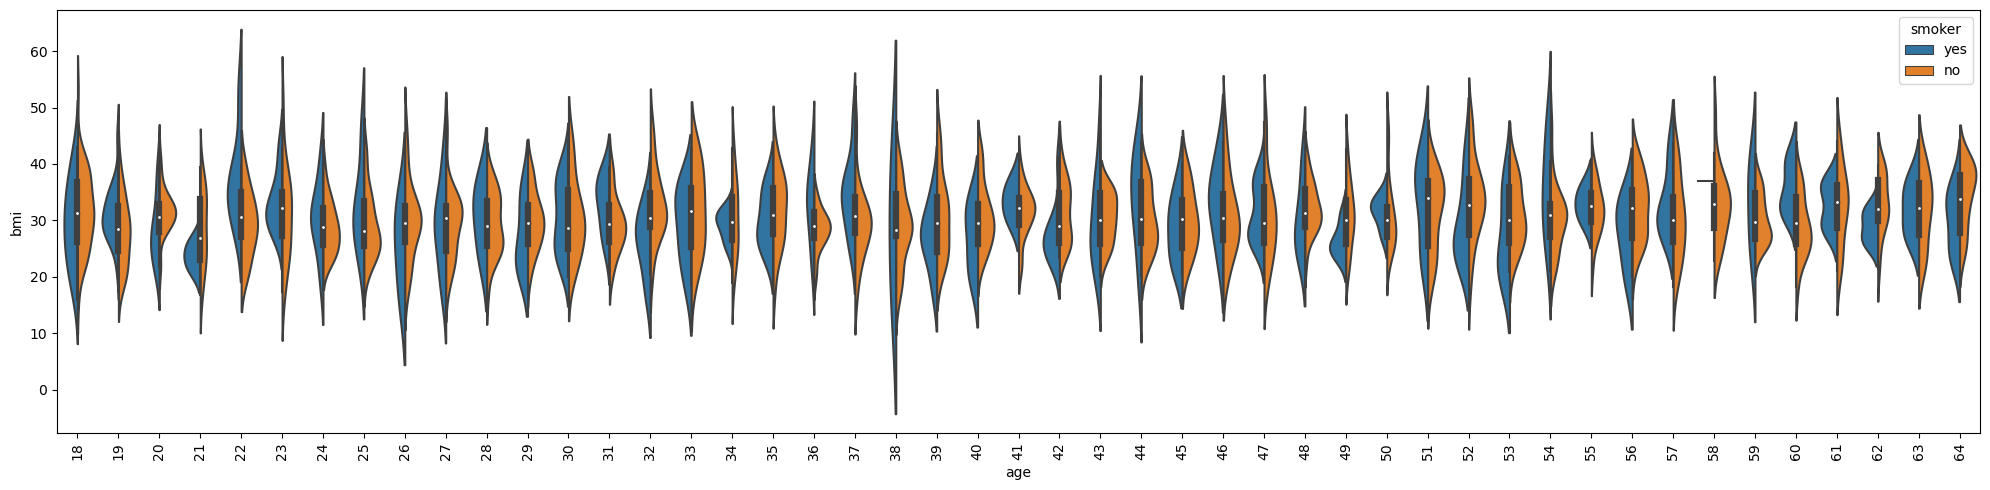

In [26]:
plt.figure(figsize=(20, 5))

sns.violinplot(data=df, x='age', y='bmi', hue = 'smoker' ,split=True)

plt.xlabel('age')
plt.ylabel('bmi')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

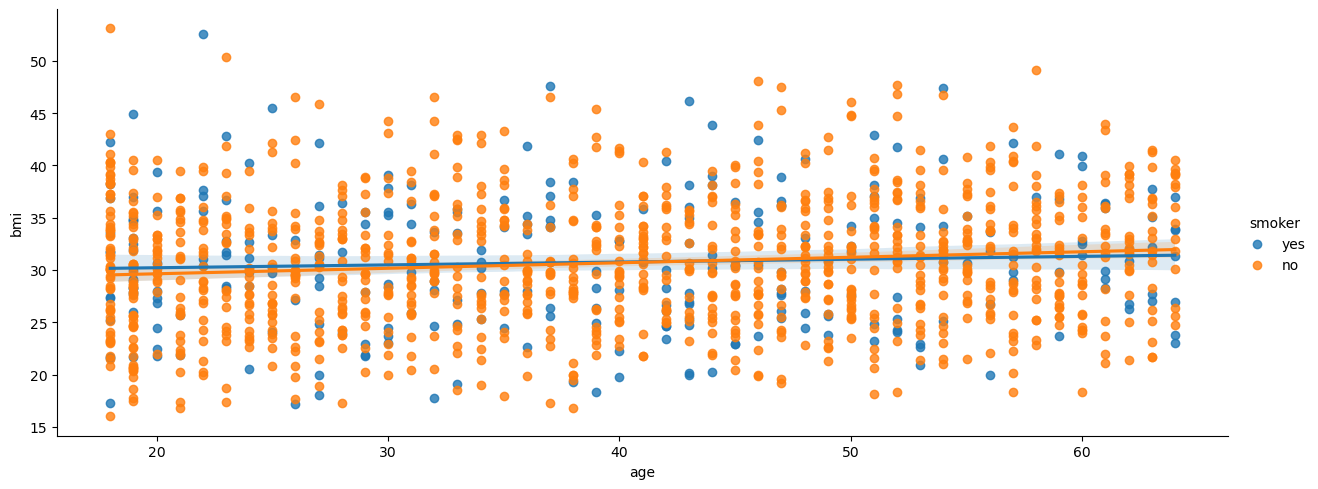

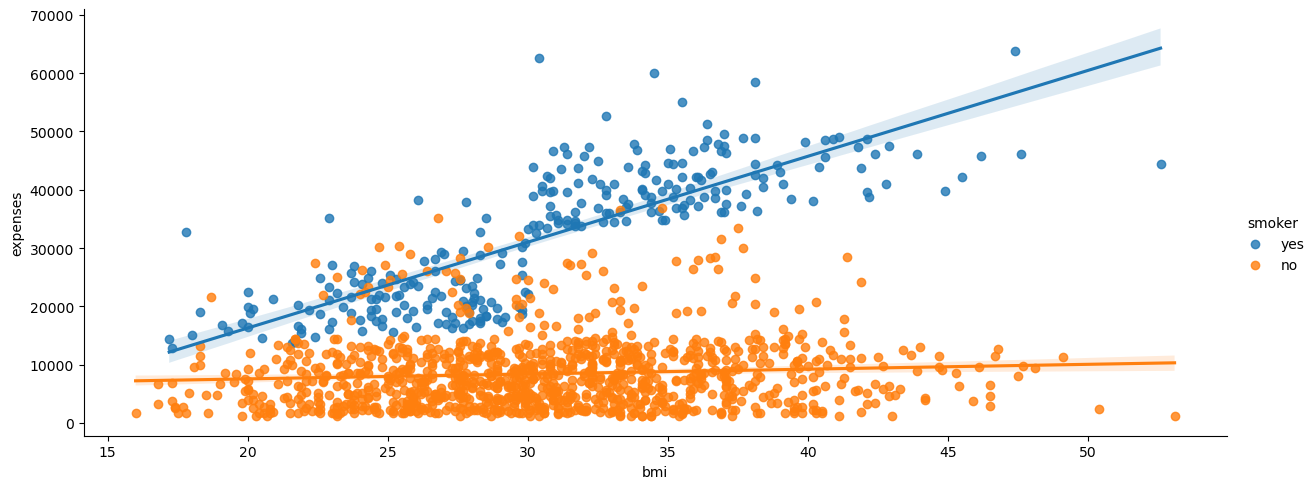

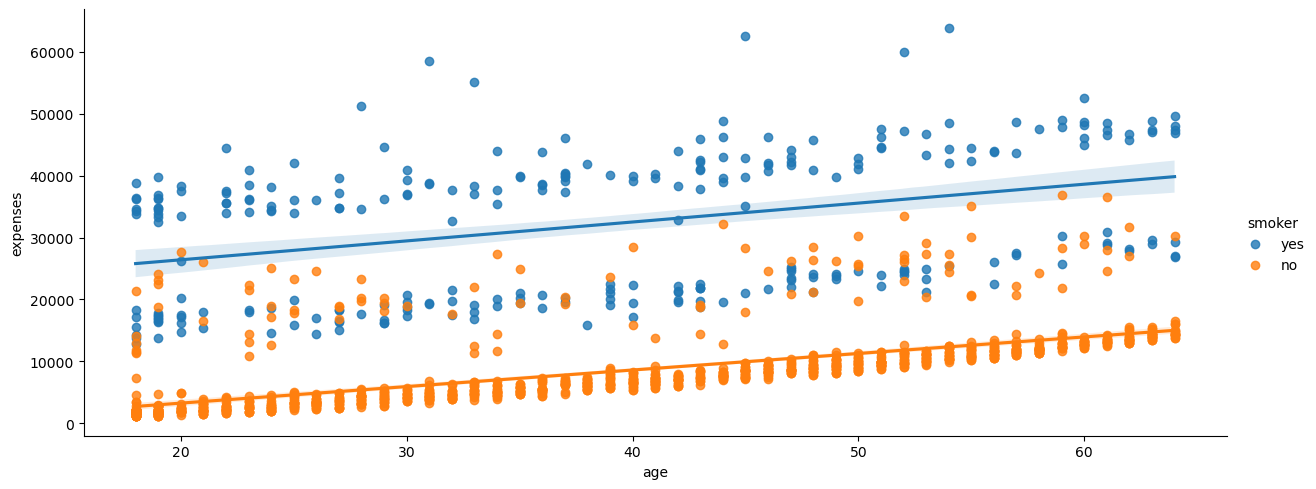

In [27]:
sns.lmplot(data=df, x='age', y='bmi', hue='smoker', aspect=2.5)
sns.lmplot(data=df, x='bmi', y='expenses', hue='smoker', aspect=2.5)
sns.lmplot(data=df, x='age', y='expenses', hue='smoker', aspect=2.5)

plt.show()

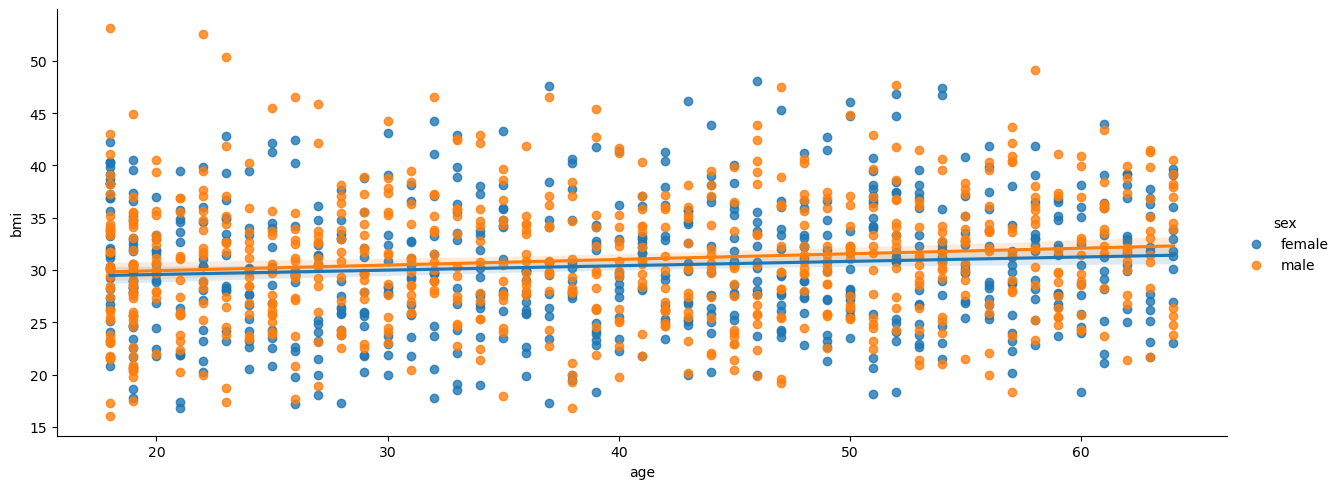

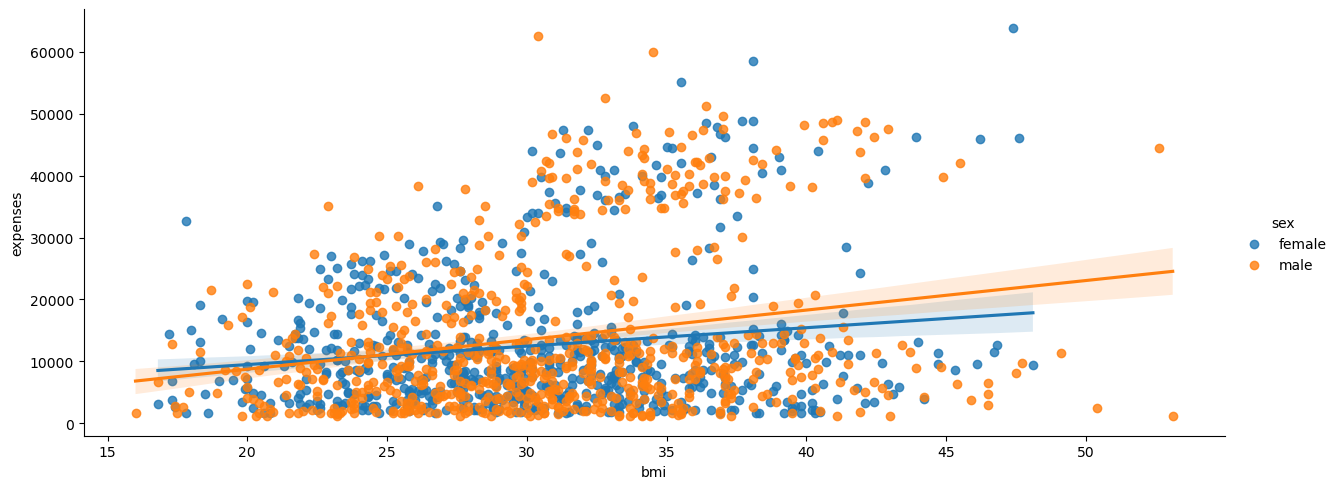

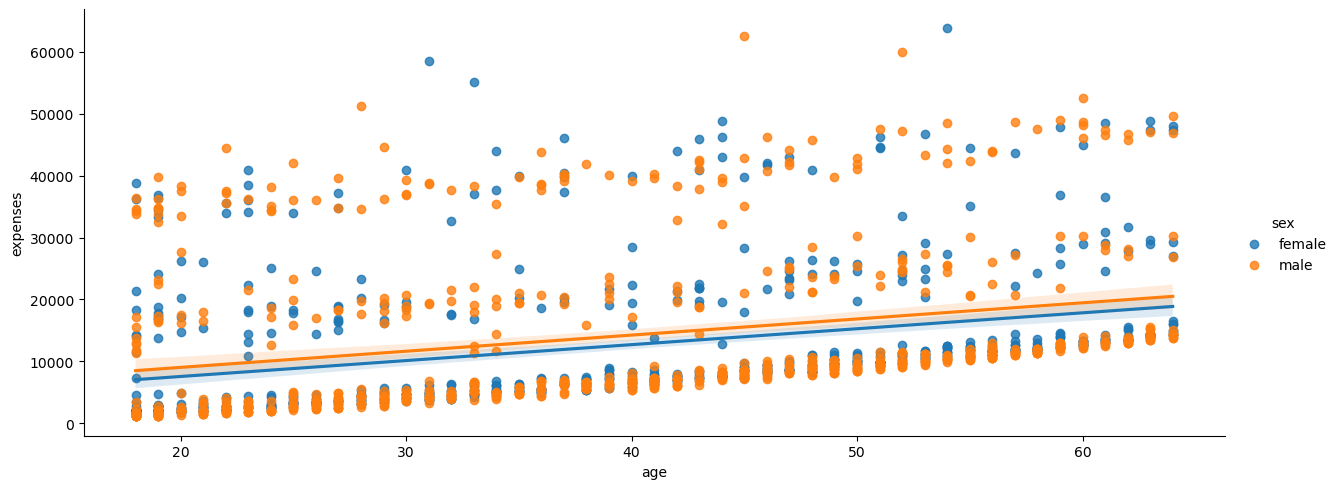

In [28]:
sns.lmplot(data=df, x='age', y='bmi', hue='sex', aspect=2.5)
sns.lmplot(data=df, x='bmi', y='expenses', hue='sex', aspect=2.5)
sns.lmplot(data=df, x='age', y='expenses', hue='sex', aspect=2.5)

plt.show()

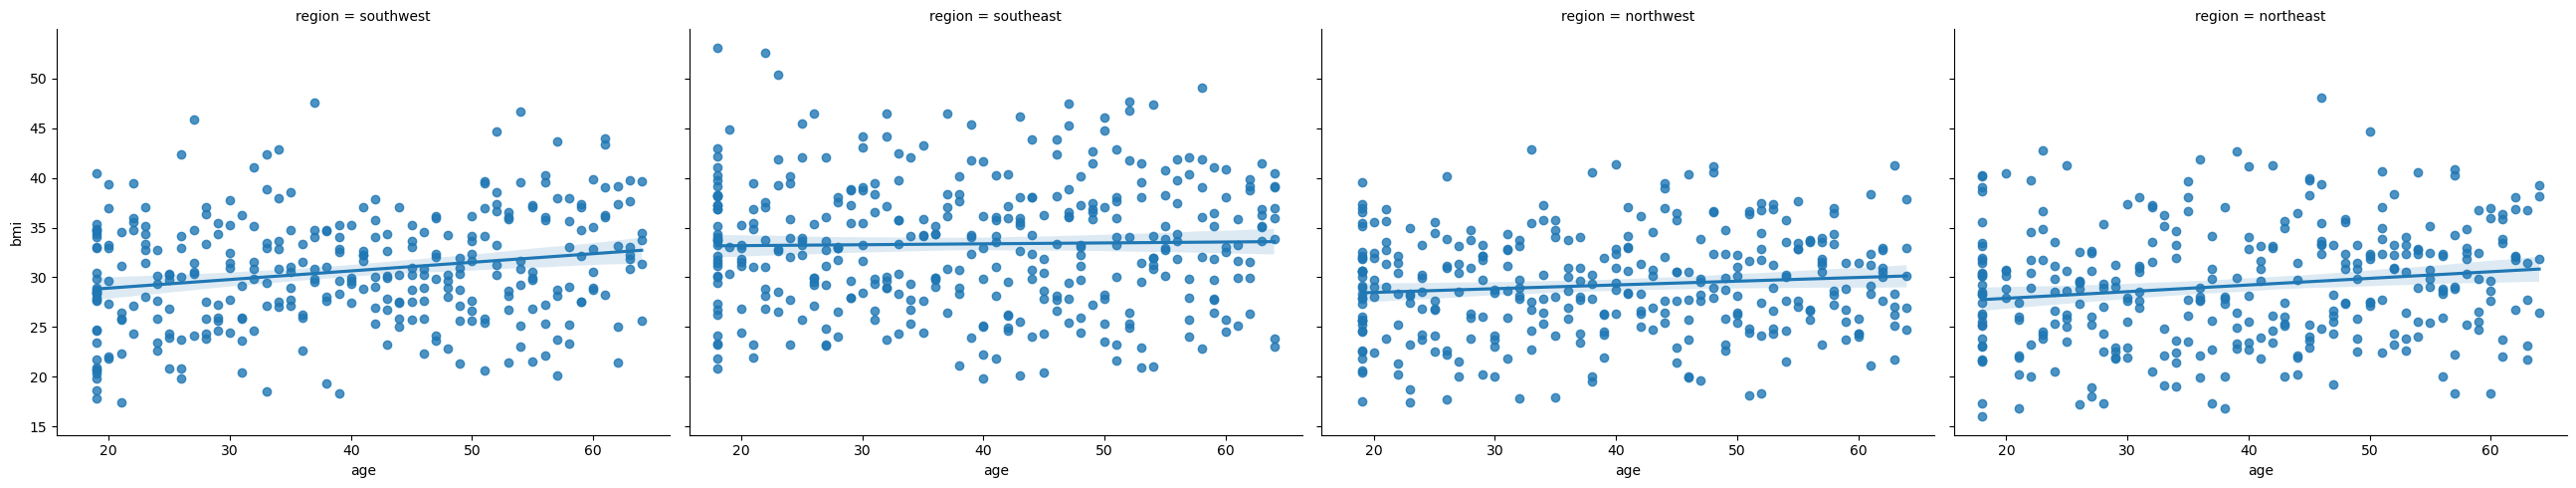

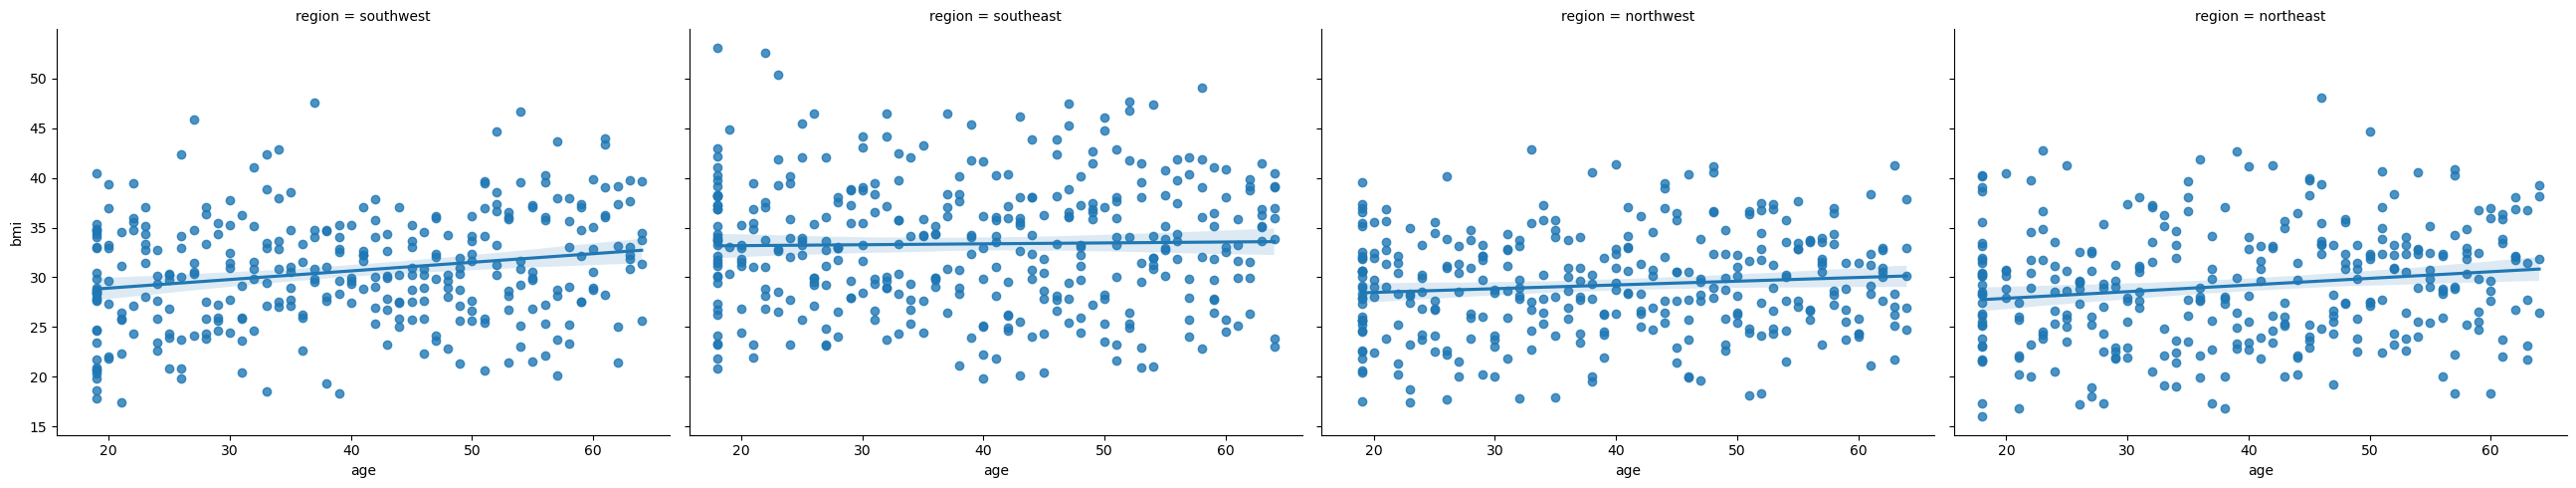

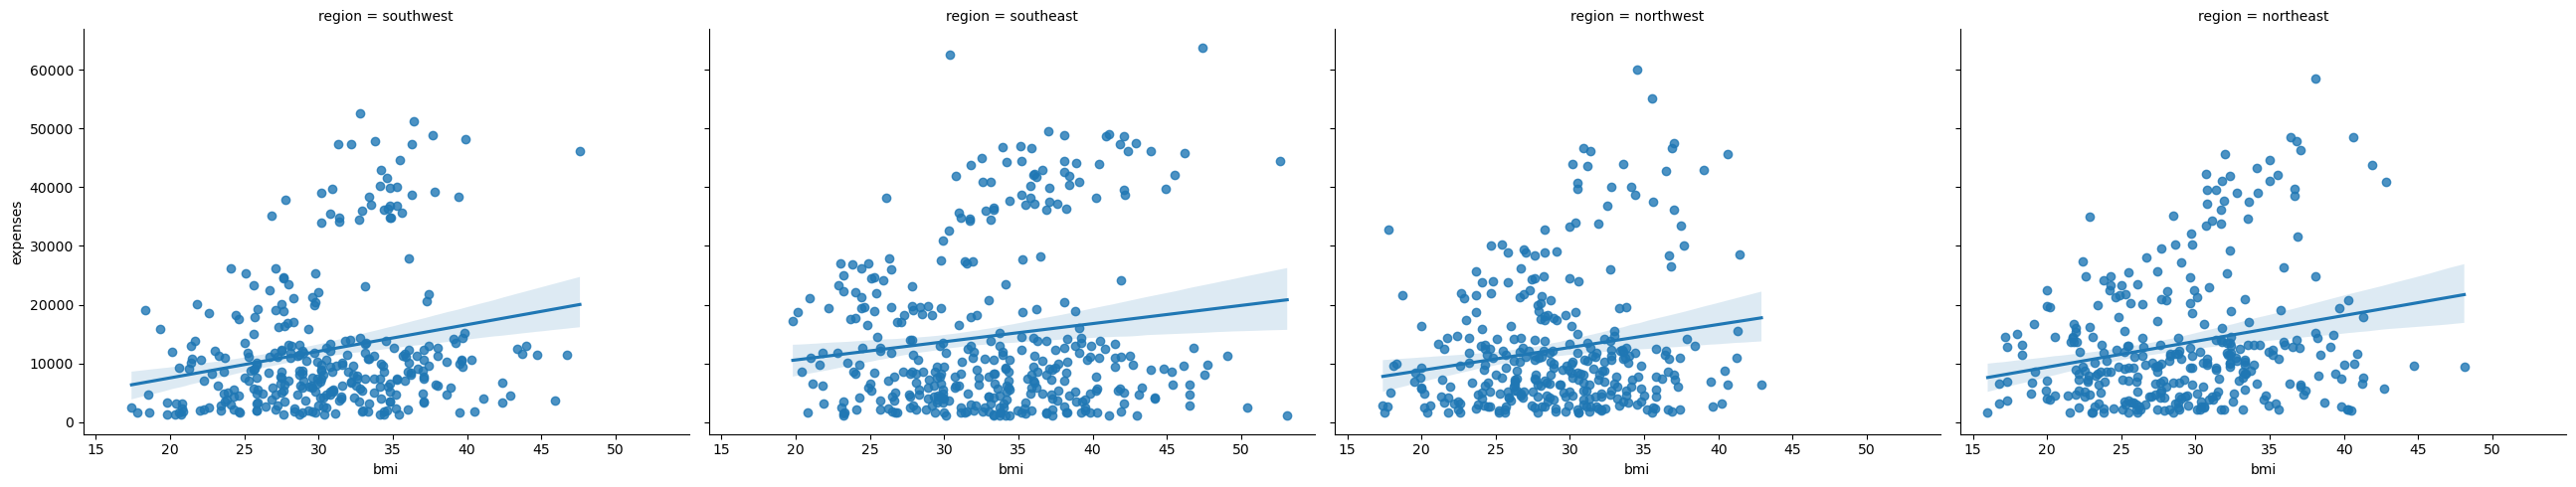

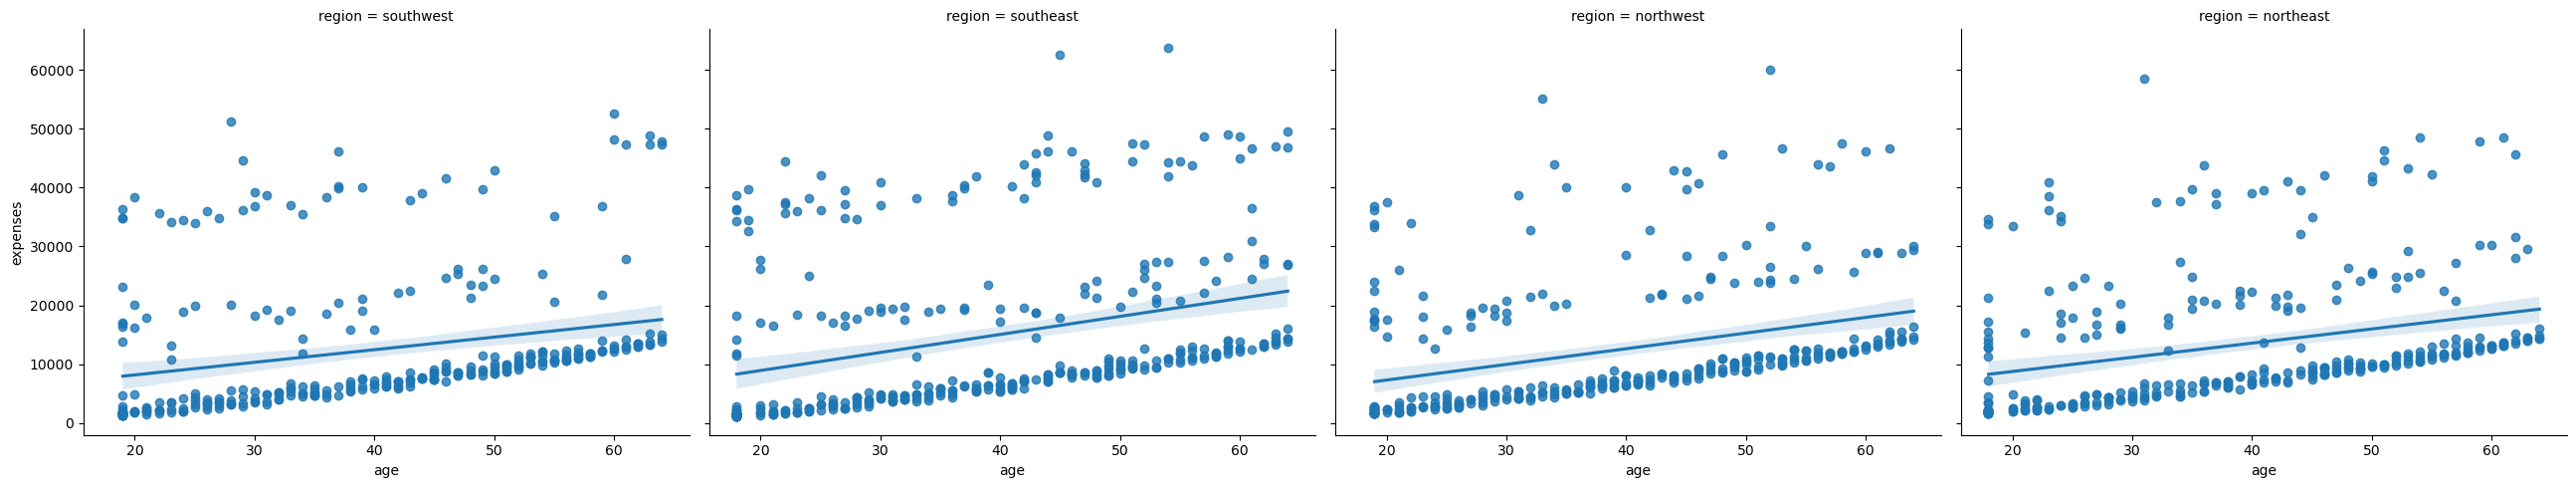

In [30]:
sns.lmplot(data=df, x='age', y='bmi', col ='region', aspect=1.3)
sns.lmplot(data=df, x='bmi', y='expenses', col ='region', aspect=1.3)
sns.lmplot(data=df, x='age', y='expenses', col ='region', aspect=1.3)

plt.show()

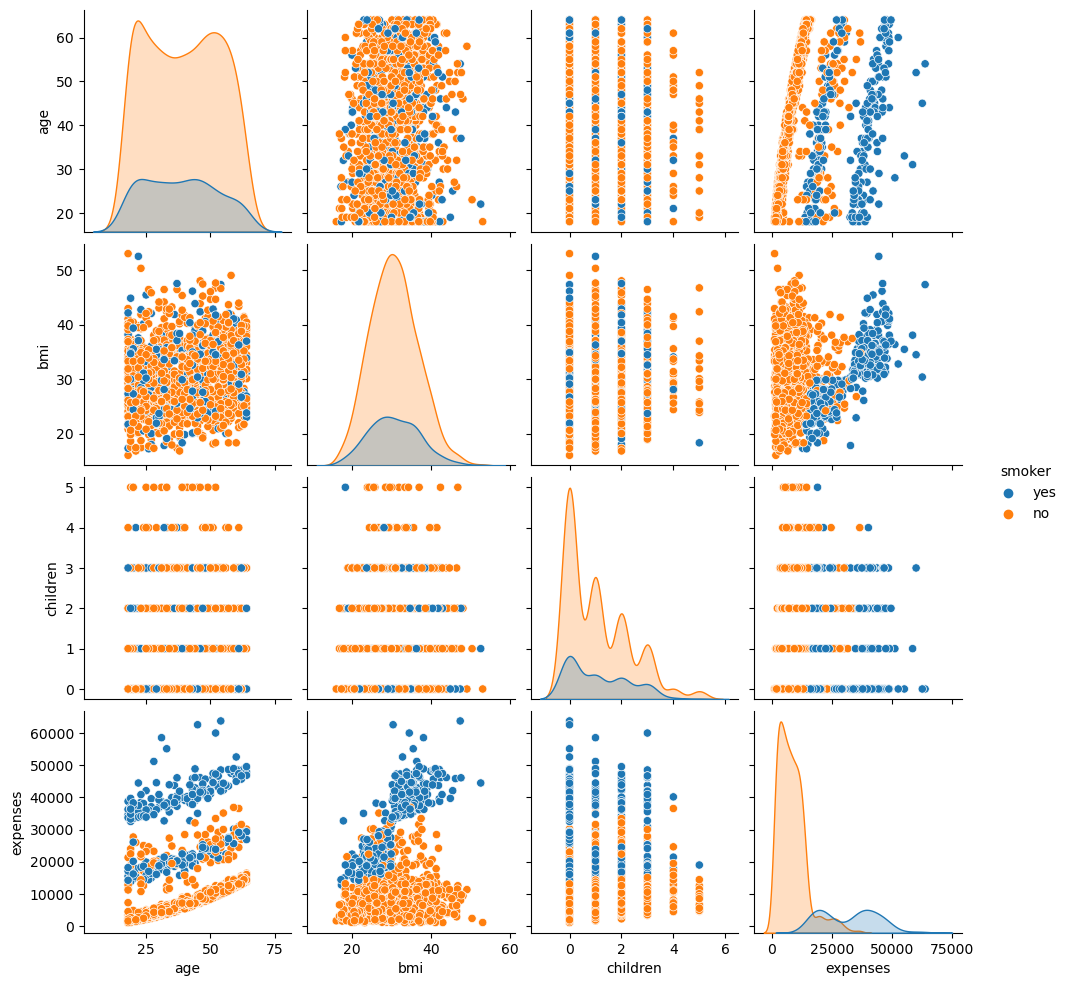

In [31]:
sns.pairplot(df, hue = 'smoker')
plt.show()

## By Using Encoder

In [32]:
lb = LabelEncoder()

df['smoker'] = lb.fit_transform(df['smoker'])
df['sex'] = lb.fit_transform(df['sex'])

df.head(1)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92


## By using Modeling and Evaluation

In [34]:
X = df[['age', 'sex', 'bmi', 'smoker']]
y = df['expenses']

In [35]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Mean", X_scaled.mean(axis=0))
print("Desv", X_scaled.std(axis=0))

Mean [-1.80556450e-16 -1.23468749e-16 -4.08907255e-16  1.06209676e-17]
Desv [1. 1. 1. 1.]


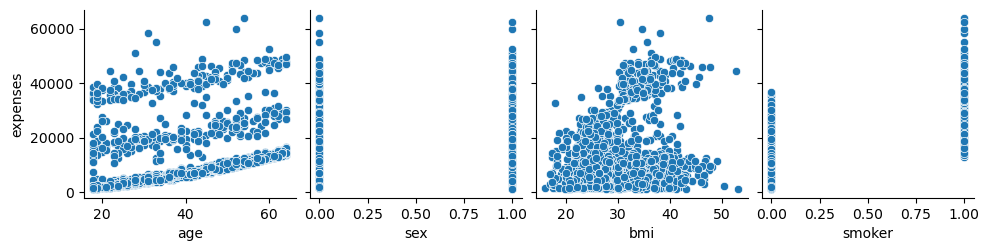

In [36]:
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'smoker'], y_vars='expenses', kind='scatter')
plt.show()


## Train Test Split 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## By using Linear Regression 

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_l = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2_l}')

Mean Squared Error: 34518609.43235573
R^2 Score: 0.777656096744384


## SVC

In [39]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train.ravel())
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svc = r2_score(y_test, y_pred_svm)

print(f'Mean Squared Error (SVM): {mse_svm}')
print(f'R^2 Score: {r2_svc}')

Mean Squared Error (SVM): 152254413.10405338
R^2 Score: 0.019287246672324843


## Random Forest 

In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_r = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R^2 Score: {r2_r}')

Mean Squared Error (Random Forest): 23632747.317922406
R^2 Score: 0.777656096744384


##Decision Tree 

## Decision Tree (using)

In [41]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train.ravel())
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error (Decision Tree): {mse_dt}')
print(f'R^2 Score: {r2_dt}')

Mean Squared Error (Decision Tree): 41605746.181593835
R^2 Score: 0.7320058902718465


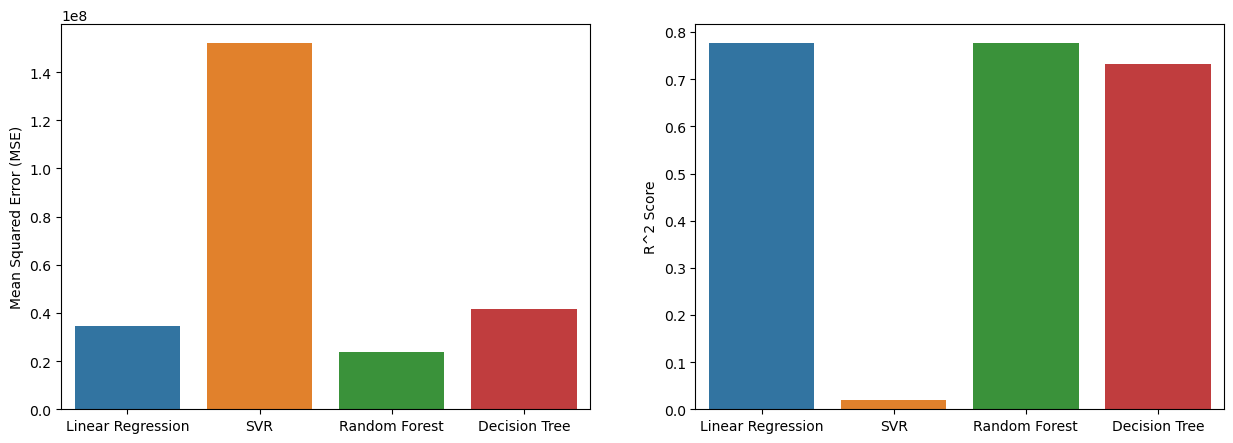

In [42]:
Y_R = [mse, mse_svm, mse_rf, mse_dt]
Y_R2 = [r2_l, r2_svc, r2_r, r2_dt]
X_R = ['Linear Regression', 'SVR', 'Random Forest', 'Decision Tree']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=X_R, y=Y_R, ax =ax[0])
sns.barplot(x=X_R, y=Y_R2, ax =ax[1])

ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[1].set_ylabel('R^2 Score')
plt.show()

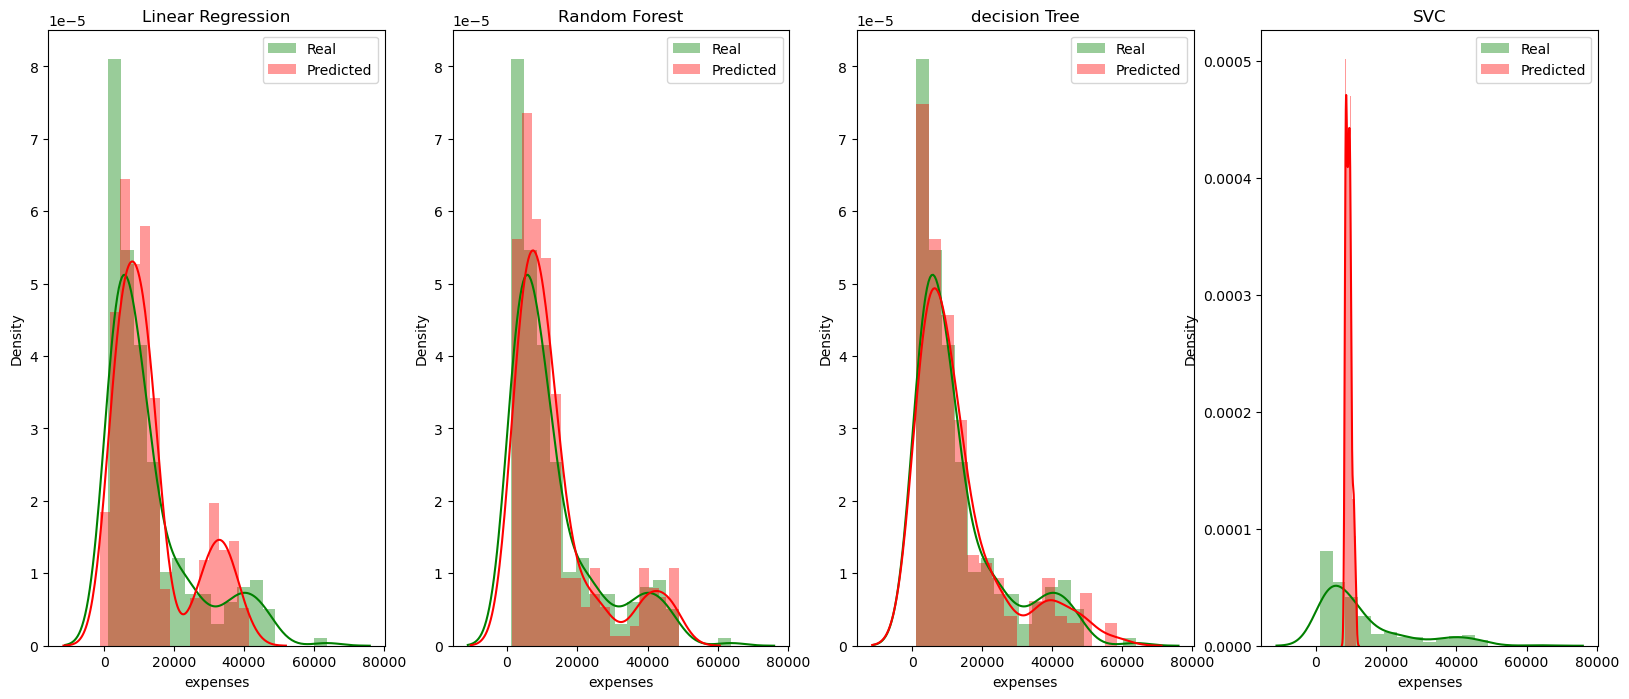

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(y_pred, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(y_pred_rf, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(y_pred_dt, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(y_pred_svm, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Linear Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')


ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()

## Completed This code by Kolluru Saharsh 

## The end 